# Introduction à SymPy

## Qu’est-ce que le calcul symbolique ?

Le calcul symbolique consiste à effectuer des calculs sur des objets mathématiques de manière symbolique. Cela signifie que les objets mathématiques sont représentés **exactement**, et non de façon approximative, et que les expressions mathématiques comportant des variables non évaluées sont conservées sous forme symbolique.

Prenons un exemple. Supposons que nous voulions utiliser les fonctions intégrées de Python pour calculer des racines carrées. Nous pourrions faire quelque chose comme ceci :

In [18]:
import math
math.sqrt(9)

3.0

9 est un carré parfait, donc nous avons obtenu la réponse exacte : 3.

Mais supposons que nous calculions la racine carrée d’un nombre qui **n’est pas** un carré parfait.

In [19]:
math.sqrt(8)

2.8284271247461903

Ici, nous avons obtenu un résultat **approximatif**. `2.82842712475` n’est pas la racine carrée exacte de 8 (en effet, la véritable racine carrée de 8 ne peut pas être représentée par un nombre décimal fini, puisqu’il s’agit d’un **nombre irrationnel**). Si tout ce qui nous intéressait était la forme décimale de la racine carrée de 8, nous pourrions nous arrêter là.

Mais supposons que nous voulions aller plus loin. Rappelons que $\sqrt{8} = \sqrt{4 \cdot 2} = 2\sqrt{2}$.
Il serait difficile de déduire cela à partir du résultat précédent. C’est là qu’intervient le **calcul symbolique**.
Avec un système de calcul symbolique comme **SymPy**, les racines carrées de nombres qui ne sont pas des carrés parfaits sont laissées **non évaluées** par défaut.

In [20]:
import sympy
sympy.sqrt(3)

sqrt(3)

De plus — et c’est ici que l’on commence à percevoir la véritable puissance du calcul symbolique — les résultats symboliques peuvent être **simplifiés symboliquement**.

In [21]:
sympy.sqrt(8)

2*sqrt(2)

## Un exemple plus intéressant

L’exemple précédent commence à montrer comment nous pouvons manipuler exactement des nombres irrationnels avec SymPy.
Mais SymPy est bien plus puissant que cela.

Les systèmes de calcul symbolique (que l’on appelle d’ailleurs souvent **systèmes d’algèbre informatique**, ou simplement **CAS** pour *Computer Algebra Systems*) tels que SymPy sont capables de manipuler des **expressions symboliques comportant des variables**.

Comme nous le verrons plus loin, dans SymPy, les variables sont définies à l’aide de `symbols`.
Contrairement à de nombreux autres systèmes de manipulation symbolique, les variables dans SymPy doivent être **définies avant d’être utilisées** (la raison de cette contrainte sera discutée dans la section suivante).

Définissons une expression symbolique représentant l’expression mathématique :
$x + 2y$.


In [22]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2 * y
expr

x + 2*y

Remarquez que nous avons écrit $x + 2 * y$ exactement comme nous le ferions si $x$ et $y$ étaient de simples variables Python ordinaires.  
Mais dans ce cas, au lieu d’être évaluée à une valeur, l’expression reste simplement $x + 2 * y$.  

Voyons maintenant ce que nous pouvons en faire :

In [10]:
expr + 1

x + 2*y + 1

In [11]:
expr - x

2*y

Remarquez quelque chose dans l’exemple ci-dessus.

Lorsque nous avons tapé `expr - x`, nous n’avons pas obtenu `x + 2*y - x`, mais simplement `2*y`.  
Les termes $x$ et $-x$ se sont automatiquement **simplifiés** l’un avec l’autre.  

C’est similaire à la manière dont `sqrt(8)` s’est automatiquement transformé en `2*sqrt(2)` plus haut.

Cependant, ce **n’est pas toujours le cas** dans SymPy :

In [12]:
x * expr

x*(x + 2*y)

Ici, on aurait pu s’attendre à ce que l’expression soit transformée, mais au lieu de cela, elle est restée inchangée.

C’est un **comportement typique** de SymPy.  

À part quelques simplifications évidentes (comme $x - x = 0$ ou $\sqrt{8} = 2\sqrt{2}$), la plupart des simplifications **ne sont pas effectuées automatiquement**.  
La raison en est que, selon le contexte, on peut préférer la **forme factorisée** d’une expression ou, au contraire, sa **forme développée**.  
Les deux représentations sont utiles dans des situations différentes.  

Dans SymPy, il existe des fonctions permettant de **passer d’une forme à l’autre**.

In [13]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
expanded_expr

x**2 + 2*x*y

In [14]:
factor(expanded_expr)

x*(x + 2*y)

## La puissance du calcul symbolique

La véritable puissance d’un système de calcul symbolique comme **SymPy** réside dans sa capacité à effectuer **toutes sortes de calculs de manière symbolique**.  
SymPy peut simplifier des expressions, calculer des dérivées, des intégrales et des limites, résoudre des équations, manipuler des matrices, et bien plus encore — le tout **symboliquement**.

Il comprend également des modules pour la **visualisation** (graphiques), l’**affichage** (comme la mise en forme lisible en 2D des formules mathématiques, ou encore la sortie en **LaTeX**), la **génération de code**, ainsi que des outils pour la **physique**, les **statistiques**, les **combinatoires**, la **théorie des nombres**, la **géométrie**, la **logique**, et bien d’autres domaines.

Voici un petit aperçu des capacités symboliques de SymPy, juste pour vous **ouvrir l’appétit**.

In [23]:
from sympy import *
x, t, z, nu = symbols('x t z nu')

Cela permettra à tous les exemples suivants d’être **affichés joliment** à l’aide de **caractères Unicode**.

In [24]:
init_printing(use_unicode=True)

Calculons la **dérivée** de $ \sin(x) \times e^x $.

In [25]:
diff(sin(x)*exp(x), x)

Calculons $\int{(e^x * sin(x) + e^x * cos(x))dx}$.

In [26]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

Calculons $\int^{inf}_{-inf}{sin(x^2)dx}$.

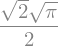

In [27]:
integrate(sin(x**2), (x, -oo, oo))

Calculons $\lim_{x \rightarrow 0}{\frac{sin(x)}{x}}$

In [28]:
limit(sin(x)/x, x, 0)

Résolvons $x^2 - 2 = 0$

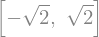

In [29]:
solve(x**2 - 2, x)

Résolvons l'équation différentielle $y''  - y = e^t$

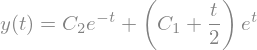

In [30]:
y = Function('y')
dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t))

Trouvons les valeurs propres de $
\begin{bmatrix}
1 & 2 \\
2 & 2
\end{bmatrix}
$.

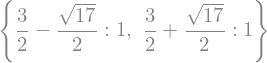

In [31]:
Matrix([[1, 2], [2, 2]]).eigenvals()

Réécris la fonction de Bessel $J_v(z)$ en termes de la fonction de Bessel sphérique $j_v(z)$.

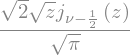

In [32]:
besselj(nu, z).rewrite(jn)

Affiche $\int_{0}^{\pi}{cos^2(x)dx}$ using LaTeX

In [34]:
latex(Integral(cos(x)**2, (x, 0, pi)))

'\\int\\limits_{0}^{\\pi} \\cos^{2}{\\left(x \\right)}\\, dx'

## Pourquoi SymPy ?

Il existe de nombreux systèmes d’algèbre informatique. Cet article de Wikipédia en répertorie plusieurs. Qu’est-ce qui fait de **SymPy** un meilleur choix que les autres ?

Tout d’abord, **SymPy est entièrement gratuit**. Il est open source et publié sous la **licence BSD**, une licence très permissive : vous pouvez donc modifier le code source et même le vendre si vous le souhaitez. Cela contraste avec des systèmes commerciaux populaires comme **Maple** ou **Mathematica**, qui coûtent des centaines de dollars en licences.

Ensuite, **SymPy utilise Python**. La plupart des systèmes d’algèbre formelle inventent leur propre langage. Pas SymPy. SymPy est écrit entièrement en Python et s’exécute entièrement en Python. Cela signifie que si vous connaissez déjà Python, il est beaucoup plus facile de débuter avec SymPy, puisque vous maîtrisez déjà la syntaxe (et si vous ne connaissez pas Python, c’est un langage très facile à apprendre). Nous savons déjà que Python est un langage bien conçu et largement éprouvé. Les développeurs de SymPy sont confiants dans leurs compétences en écriture de logiciels mathématiques, mais la conception d’un langage de programmation est un tout autre domaine. En réutilisant un langage existant, ils peuvent se concentrer sur l’essentiel : **les mathématiques**.

Un autre système d’algèbre informatique, **Sage**, utilise également Python comme langage. Mais Sage est volumineux : son téléchargement dépasse le gigaoctet. L’un des avantages de SymPy est qu’il est **léger**. En plus d’être relativement petit, il **n’a aucune dépendance autre que Python**, ce qui le rend facile à utiliser presque partout. De plus, les objectifs de Sage et ceux de SymPy sont différents. Sage vise à être un système complet pour les mathématiques, et il le fait en **intégrant** de nombreux systèmes open source existants. Par exemple, lorsqu’on appelle une fonction dans Sage, comme `integrate`, Sage fait appel à l’un des paquets qu’il inclut — et **SymPy en fait partie**.
SymPy, en revanche, cherche à être un **système indépendant**, avec toutes ses fonctionnalités **implémentées en interne**.

Enfin, un autre point important est que **SymPy peut être utilisé comme bibliothèque**. De nombreux systèmes d’algèbre informatique sont surtout conçus pour une utilisation interactive ; si vous souhaitez les automatiser ou les étendre, cela devient difficile. Avec SymPy, vous pouvez aussi bien l’utiliser dans un environnement interactif Python que **l’importer dans vos propres applications Python**. SymPy fournit également des **API** qui facilitent l’extension du système avec vos **propres fonctions personnalisées**.
